# Goutham Selvakumar
# Assignment - 2 (DSC 478)
# Question 1

K-Nearest-Neighbor (KNN) classification on Newsgroups

a. [5 pts] Load the data sets, including the train and test matrices as well as the train and test labels. Show the top 20 terms in the decreasing order of total training frequency (total number of occurences of the term across all documents in the training data). Then plot the distribtution of term frequencies in the training data (using a line plot similar to class examples).

In [1]:
#Importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Loading the files and running 
tr_Matrix = pd.read_table("C:/Users/admin/Desktop/trainMatrixModified.txt", header = None)
te_Matrix = pd.read_table("C:/Users/admin/Desktop/testMatrixModified.txt", header = None)
tr_lables = pd.read_table("C:/Users/admin/Desktop/trainClasses.txt",header = None, index_col=0)
te_lables = pd.read_table("C:/Users/admin/Desktop/testClasses.txt",header = None, index_col=0)
terms = pd.read_table("C:/Users/admin/Desktop/modifiedterms.txt", header = None)

In [3]:
te_Matrix.shape

(5500, 200)

In [4]:
tr_Matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
terms.shape

(5500, 1)

In [6]:
#TD to DT matrix
DT_train = tr_Matrix.T
DT_test = te_Matrix.T

In [7]:
term_fr = tr_Matrix.sum(axis=1)
term_fr[0:20]

0     102.0
1      11.0
2      22.0
3     959.0
4     222.0
5      84.0
6     108.0
7     262.0
8      55.0
9     318.0
10     69.0
11     41.0
12    148.0
13    128.0
14    128.0
15    146.0
16    201.0
17     39.0
18    159.0
19      6.0
dtype: float64

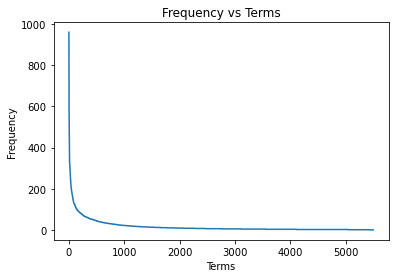

In [8]:
#Plotting the TermFrequency
plt.plot(sorted(term_fr,reverse=True));
plt.title('Frequency vs Terms')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.show()

b. [10 pts] Create your own K-Nearest-Neighbor classifier function. Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K (number of neighbors), and should return the predicted class for the instance and the indices of the top K neighbors. Your classifier should work with Euclidean distance as well as Cosine distance (which is 1 minus the Cosine similarity). You may create two separate classifiers, or add the distance metric as a parameter in the classifier function (an example implementation of a KNN classifier was provided in class examples). Show that your classifier works by running it on the first two instances in the test data using both Cosine and Euclidean distance in each case.

In [9]:
#Finding the KNN of an instance x among the instances in D
def knn_search(x, D, K, measure):
    if measure == 0:
#The euclidean distances are taken from the other points 
        dist_s = np.sqrt(((D - x)**2).sum(axis = 1))
    elif measure == 1:
#Firstly, the vector norm is found for each instance in D, as well as the norm for vector x
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        sims = np.dot(D,x)/(D_norm * x_norm)
#Cosine Similarity is the inverse of distance measure
        dist_s = 1 - sims
    idx = np.argsort(dist_s) 
#KNN indexes are being returned 
    return idx[:K], dist_s    
def knn_classify(x, D, K, labels, measure):
    from collections import Counter
    neigh_idx, distances = knn_search(x, D, K, measure)
    neigh_labels = labels[neigh_idx]
    count = Counter(neigh_labels)
    predic_label = count.most_common(1)[0][0]
    return neigh_idx, predic_label

In [10]:
DT_train = np.array(DT_train)
DT_test = np.array(DT_test)
terms_tr = np.array(tr_lables).flatten()
terms_te = np.array(te_lables).flatten()

In [11]:
#Importing the scikit-learn
from sklearn import preprocessing
#MinMax Processing
minmax_scaler = preprocessing.MinMaxScaler()
tr_norm = minmax_scaler.fit_transform(DT_train)
te_norm = minmax_scaler.fit_transform(DT_test)

In [12]:
top_K_neighors, class_predic = knn_classify(te_norm[0], tr_norm, 10, terms_tr, 0)
print(top_K_neighors, class_predic)

[685 757 798 711  38 342 326 224 554 743] 0


In [13]:
top_K_neighors, class_predic = knn_classify(te_norm[0], tr_norm,10, terms_tr, 1)
print(top_K_neighors, class_predic)

[685 628 152 570  24 675   1 763 109 194] 1


In [14]:
top_K_neighors, class_predic = knn_classify(te_norm[1], tr_norm,10, terms_tr, 0)
print(top_K_neighors, class_predic)

[757 798 711  38 342 554 326 224 743  20] 0


In [15]:
top_K_neighors, class_predic = knn_classify(te_norm[1], tr_norm,10, terms_tr, 1)
print(top_K_neighors, class_predic)

[587 269 199 779 550 458 461 784 498 686] 0


c. [10 pts] Create an evaluation function to measure the accuracy of your classifier. This function will call the classifier function in part a on all the test instances and in each case compares the actual test class label to the predicted class label. It should take as input the training data, the training labels, the test instances, the labels for test instances, and the value of K. Your evaluation function should return the Classification Accuracy (ratio of correct predictions to the number of test instances) [See class notes: Classification & Prediction - Review of Basic Concepts].


In [16]:
def knn_evaluate(test_instances, test_labs, training_data, train_labs, K, measure):
# test_instances: An array of test instances 
# test_labs: An array of class labels for the respective test instances 
# training_data: Training Instances
# train_labs: An array of class labels for the respective training instances 
    T=0 
    F=0 
    for i in range(len(test_instances)):
        actual=test_labs[i]
        top_K_neighbors, predicted = knn_classify(test_instances[i], training_data, K, train_labs, measure)
        if actual == predicted:
            T += 1       
        else:
            F += 1     
    acc = float(T)/float(T+F) 
    return acc

In [17]:
acc = knn_evaluate(te_norm, terms_te, tr_norm, terms_tr, 10, 0)
print("KNN classification accuracy: ", acc)

KNN classification accuracy:  0.525


d. [10 pts] Run your evaluation function on a range of values for K from 5 to 100 (in increments of 5) in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. Present the results as graphs with K in the x-axis and the evaluation metric (accuracy) on the y-axis. Use a single plot to compare the two version of the classifier (Euclidean distance version vs. cosine similarity version).

In [18]:
def incrementK(test_instances, test_labs, training_data, train_labs):
    acc_Matrix = np.zeros([20,3])
    index=0
    for K in range(5, 105, 5):
        euclidian_Acc= knn_evaluate(test_instances, test_labs, training_data, train_labs, K, 0)
        cosine_Acc = knn_evaluate(test_instances, test_labs, training_data, train_labs, K, 1)
        acc_Matrix[index]= [K, euclidian_Acc, cosine_Acc]
        index +=1
    return acc_Matrix

In [19]:
#Accuracy Matrix 
acc_Matrix = incrementK(te_norm, terms_te, tr_norm, terms_tr )
for row in acc_Matrix:
    print("%2.0f   %.2f    %.2f" % (row[0], row[1], row[2]))

 5   0.61    0.96
10   0.53    0.96
15   0.51    0.95
20   0.49    0.95
25   0.49    0.94
30   0.49    0.94
35   0.49    0.94
40   0.49    0.94
45   0.49    0.94
50   0.49    0.94
55   0.49    0.94
60   0.49    0.94
65   0.49    0.94
70   0.49    0.94
75   0.49    0.94
80   0.49    0.93
85   0.49    0.93
90   0.49    0.94
95   0.49    0.93
100   0.49    0.93


In [20]:
df = pd.DataFrame(acc_Matrix, columns = ['K', 'euclidian_Acc', 'cosine_Acc'])

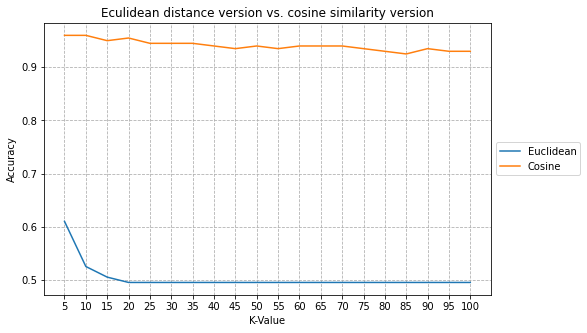

In [21]:
plt.figure(figsize=(8,5))
plt.plot(df['K'], df['euclidian_Acc'], label ="Euclidean")
plt.plot(df['K'], df['cosine_Acc'], label ="Cosine")
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.title("Eculidean distance version vs. cosine similarity version")
plt.grid(linestyle = '--')
plt.xticks(df['K'])
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

e. [10 pts] Next, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies). [See class notes on Text Categorization]. Then, rerun your evaluation (only for the Cosine similarity version of the classifier) on the range of K values (as above) and create a chart comparing the results with and without using TFxIDF weights.
 

In [22]:
n_Terms = DT_train.shape[1]
n_Terms

5500

In [23]:
DT_test.shape

(200, 5500)

In [24]:
n_Docs = DT_train.shape[0]
n_Docs

800

In [25]:
#Finding the doc counts for each of the term 
doc_terms = pd.DataFrame([(DT_train.T!=0).sum(1)]).T
doc_terms

,0
0,50
1,7
2,10
3,800
4,108
...,...
5495,3
5496,3
5497,2
5498,2


In [26]:
#Creating Matrix with all entries
N_Matrix = np.ones(np.shape(DT_train.T), dtype=float)*n_Docs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(N_Matrix)

[[800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 ...
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]]


In [27]:
#Each entry is converted into the IDF values
#Dividing the N_Matrix by the numpy array (same for test data)
IDF = np.log2(np.divide(N_Matrix, np.array(doc_terms)))
print(IDF[0:5])

[[4.   4.   4.   ... 4.   4.   4.  ]
 [6.84 6.84 6.84 ... 6.84 6.84 6.84]
 [6.32 6.32 6.32 ... 6.32 6.32 6.32]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [2.89 2.89 2.89 ... 2.89 2.89 2.89]]


In [28]:
#TF*IDF for test data and the train data is computed
TD_tf_idf = DT_train.T * IDF
pd.set_option("display.precision", 2)
TD_tf_idf

array([[ 8.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [13.67,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [12.64,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [29]:
#numpy arrays and document by term are required by the KNN fns
DT_tf_idf = TD_tf_idf.T
dtm_train_idf = np.array(DT_tf_idf)
dtm_train_idf

array([[ 8.  , 13.67, 12.64, ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [30]:
def Knn_Cosine_IncrementK(test_instances, test_labs, training_data, train_labs):
    acc_Matrix = np.zeros([20,2])
    index=0
    for K in range(5, 105, 5):
        for i in range(len(test_instances)):
            x_IDF_Test= test_instances[i] * IDF.T[i]
            cosine_Acc = knn_evaluate(x_IDF_Test, test_labs, training_data, train_labs, K, 1)
            acc_Matrix[index]= [K, cosine_Acc]
            index +=1
    return acc_Matrix

In [31]:
dt_test = np.array(DT_test)
dt_test.shape

(200, 5500)

In [32]:
def knn_evaluate_idf(te_data, te_labels, tr_data, tr_labels, K, measure):
    correct=0 
    total = len(te_data)
    for i in range(total):
        x_tfidf = te_data[i] * IDF.T[i]
        top_K_neighbors, predicted = knn_classify(x_tfidf, tr_data, K, tr_labels, measure)
        if(te_labels[i] == predicted):
            correct += 1       
    acc = correct/total
    return acc

In [33]:
%%time
cosine=(knn_evaluate_idf(dt_test,  terms_te, dtm_train_idf, terms_tr, 10, 1))
print(cosine)

0.99
CPU times: total: 54.8 s
Wall time: 5.53 s


In [34]:
cosine_idf =[]
for K in range(5, 101, 5):
    cosine_idf.append(knn_evaluate_idf(dt_test,  terms_te, dtm_train_idf, terms_tr, K, 1))

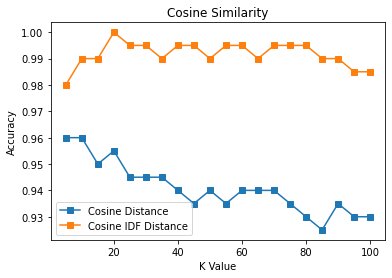

In [35]:
x = acc_Matrix[:,0]
cosine= acc_Matrix[:,2]
cosine_reg= acc_Matrix[2]
plt.plot(x, cosine, label ="Cosine Distance", marker ="s")
plt.plot(x, cosine_idf, label ="Cosine IDF Distance", marker ="s")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Cosine Similarity")
plt.legend(loc="best")
plt.show()

When we see both the Cosine Distributions, we can clarify that the IDF weighted has more accuracy when compared to KNN without IDF with a difference of 4-5% on average.

f. [10 pts] Create a new classifier based on the Rocchio Method (also know as the "nearest centroid" method) adapted for text categorization [See class notes on Text Categorization]. You should separate the training function from the classification function. The training part for the classifier can be implemented as a function that takes as input the training data matrix and the training labels, returning the prototype vectors for each class. The classification part can be implemented as another function that would take as input the prototypes returned from the training function and the instance to be classified. This function should measure Cosine similarity of the test instance to each prototype vector. Your output should indicate the predicted class for the test instance and the similarity values of the instance to each of the category prototypes.  Finally, use your evaluation function to compare your results to the best KNN results you obtained in part d. [Note: your functions should work regardless of the number of categories (class labels) and should not be limited to two-class categorization scenario. The number of classes should not be hardcoded in your implementation.]

In [36]:
# Creating the training function separate from the classification function 
def rocchio_training(train, labels):
    num_Class = np.unique(labels)
    prototypeVector = {}
    for (i, cls) in enumerate(num_Class):
        indxs = np.array(labels.index[labels.iloc[:, 0] == cls])
        rows = train[indxs]
        prototype = np.sum(rows, axis=0)
        prototypeVector .update({i : prototype})   
    return prototypeVector

In [37]:
#Importing the numpy packages
from numpy import dot
from numpy.linalg import norm

In [38]:
def rocchio_classification(prototypes, instance):
    cosineMax = -1
    proto = -1 
#Cosine similarity between the prototype and instance have been found, after that the cosineMax is updated if it's greater than the current max.
    for k, v in prototypes.items():
        cosine = dot(instance, v)/(norm(instance)*norm(v))
        if cosine > cosineMax:
            cosineMac = cosine
            proto = k
    return proto

In [39]:
#Classification accuracy is computed using the test instances 
def rocchio_compute(data, labels, prototypes):
    total = len(data)
    corr = 0
    for i in range(total):
        label = rocchio_classification(prototypes, data[i])
        if label == labels[i]:
            corr += 1
    print("Correct: {}, Total: {}".format(corr, total))
    return corr/total

In [40]:
prototypes = rocchio_training(DT_train, tr_lables)

In [41]:
rocchio_compute(DT_test, terms_te, prototypes)

Correct: 101, Total: 200


0.505

In [42]:
prototypes_idf = rocchio_training(dtm_train_idf, tr_lables)

In [43]:
def rocchio_evaluate_idf(data, labels, prototypes):
    total = len(data)
    correct = 0
    for i in range(len(data)):
        x_tfidf = data[i] * IDF.T[i]
        label = rocchio_classification(prototypes, x_tfidf)
        if label == labels[i]:
            correct +=1
    print("Correct: {}, Total: {}".format(correct, total))
    return correct/total

In [44]:
rocchio_evaluate_idf(DT_test, terms_te, prototypes_idf)

Correct: 101, Total: 200


0.505

g. [5 pts] Using scikit-learn's Nearest Centroid classifier to perform classification of the test instances, as in the previous part. Compare the classification accuracy of your Rocchio implementation to the classification results using scikit-learn.

In [45]:
#Importing sci-kit 
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(DT_train, tr_lables)
NearestCentroid()

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NearestCentroid()

In [46]:
prediction = clf.predict(DT_test)

In [47]:
acc = clf.score(DT_test, te_lables)
print(acc)

0.94


When the K was set to 20, I was able to get the best KNN score of 100% and also with using the KNN Cosine Distance IDF. 99% was the average findings for KNN Cosine Distance IDF. However, the Rocchio was not working properly whereas it was faster in comparison to KNN. 

# 2. Predictive Modeling with Census data [Dataset: adult-modified.csv]

a. [5 pts] Load the data into a Pandas dataframe. Create dummy variables for the categorical attributes so that the data set is fully numeric. Then separate the attribute ("income_>50K") from the remaining attributes; this will be used as the target attribute for classification.  [Note: you need to drop "income_<=50K" which is also created as a dummy variable in earlier step]. Finally, split the transformed data into training and test sets (using 80%-20% randomized split). Note: use the train_test_split function from the sklearn.model_selection module with random_state = 111 to perform the split.

In [48]:
#Loading the adult_modified dataset and running it
adult = pd.read_csv("C:/Users/admin/Downloads/adult-modified_.csv")
adult.shape

(9412, 8)

In [49]:
adult.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K


In [50]:
adult_num = pd.get_dummies(adult)
adult_num.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0


In [51]:
#get the target attribute
adult_tar = adult_num.iloc[:,-1]
adult_tar

0       0
1       0
2       0
3       0
4       0
       ..
9407    1
9408    0
9409    0
9410    0
9411    0
Name: income_>50K, Length: 9412, dtype: uint8

In [52]:
#income>50K is dropped from the dataset
adult_dataset = adult_num.iloc[:,0:-2]
adult_dataset

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9407,38,10,60,1,0,0,1,0,0,0,0,0,1,0,1
9408,25,9,8,1,0,0,0,1,0,0,0,0,1,1,0
9409,21,10,40,1,0,0,0,1,0,0,1,0,0,0,1
9410,38,2,53,1,0,0,1,0,0,0,0,0,1,0,1


In [53]:
#Using the sklearn the training data and testing data is divided into eighty to twenty ratio with random state as 111 
from sklearn.model_selection import train_test_split
adult_tr, adult_te, adult_tar_tr, adult_tar_te = train_test_split(adult_dataset, adult_tar, test_size=0.2, random_state=111)
print(adult_te.shape)
print(adult_tar_te.shape)
print(adult_tr.shape)
print(adult_tar_tr.shape)

(1883, 15)
(1883,)
(7529, 15)
(7529,)


b. Use scikit-learn's KNN implementation for classification.

2 (i) : First normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Run your KNN classifier using K=10. Generate the confusion matrix (visualize it using Matplotlib) as well as the classification report. Report the model accuracy for both the training and the test sets.

In [54]:
from sklearn import preprocessing

In [55]:
minmax_scaler = preprocessing.MinMaxScaler().fit(adult_tr)
adult_tr_norm = minmax_scaler.transform(adult_tr)
adult_tr_norm = pd.DataFrame(adult_tr_norm, columns = adult_tr.columns, index = adult_tr.index)
adult_te_norm = minmax_scaler.transform(adult_te)
adult_te_norm = pd.DataFrame(adult_te_norm, columns = adult_te.columns, index = adult_te.index)

In [56]:
adult_te_norm.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
1699,0.07,0.40,0.35,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
542,0.12,0.60,0.45,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2985,0.58,0.53,0.40,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
699,0.21,0.60,0.40,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1090,0.29,0.80,0.60,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [57]:
from sklearn import neighbors, tree, naive_bayes
#KNN Classifier
N_neigh = 10
knn_clf = neighbors.KNeighborsClassifier(N_neigh)
knn_clf.fit(adult_tr_norm, adult_tar_tr)

KNeighborsClassifier(n_neighbors=10)

In [58]:
#Predict function on the test instances are called 
knn_preds_test = knn_clf.predict(adult_te_norm)
print(knn_preds_test)

[0 0 0 ... 0 0 1]


In [59]:
#Using the classification matrix, the classifier accuracy is evaluated
from sklearn.metrics import classification_report
print(classification_report(adult_tar_te, knn_preds_test))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1417
           1       0.63      0.47      0.54       466

    accuracy                           0.80      1883
   macro avg       0.74      0.69      0.71      1883
weighted avg       0.79      0.80      0.79      1883



In [60]:
#Using the confusion matrix, the classifier accuracy is evaluated
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(adult_tar_te, knn_preds_test)
print(knn_cm)

[[1290  127]
 [ 247  219]]


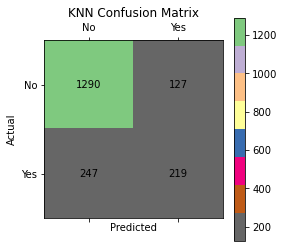

In [61]:
#Plotting the KNN Confusion Matrix
plt.matshow(knn_cm,cmap = plt.cm.Accent_r)
plt.title('KNN Confusion Matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.xticks([0,1],['No','Yes'])
plt.yticks([0,1],['No','Yes'])
for y in range(knn_cm.shape[0]):
    for x in range(knn_cm.shape[1]):
        plt.text(x, y, '{}'.format(knn_cm[y,x]), horizontalalignment = 'center', verticalalignment = 'center',)
plt.show()

In [62]:
#The average accuracy score for training data is computed 
print(knn_clf.score(adult_tr_norm, adult_tar_tr))

0.8426085801567273


In [63]:
#The average accuracy for testing data is computed 
print(knn_clf.score(adult_te_norm, adult_tar_te))

0.8013807753584705


2(ii): Next, experiment with different values of K (say from 5 to 100) and the weight parameter (i.e., with or without distance weighting) to see if you can improve accuracy of the KNN classifier. Show the results in a single plot comparing distance and uniform weighting schemes across the different values of K. Use the best values of these parameter (K and weighting scheme) to train a new KNN classifier and report the accuracy of this classifier on the training and test sets.

In [64]:
def diffK(adult_test_norm, adult_tar_te, adult_tr_norm, adult_tar_tr):
    acc= np.zeros([100,5], dtype = float)
    index=0
    for K in range(1,101):
        knn_clf = neighbors.KNeighborsClassifier(K)
        knn_clf.fit(adult_tr_norm, adult_tar_tr)
        acc_noWeight_tr =(knn_clf.score(adult_tr_norm, adult_tar_tr))
        acc_noWeight_te =(knn_clf.score(adult_te_norm, adult_tar_te))
        knn_clf_dist = neighbors.KNeighborsClassifier(K, weights = 'distance')
        knn_clf_dist.fit(adult_tr_norm, adult_tar_tr)
        acc_distance_tr =(knn_clf_dist.score(adult_tr_norm, adult_tar_tr))
        acc_distance_te =(knn_clf_dist.score(adult_te_norm, adult_tar_te))

        acc[index] = [K, acc_noWeight_tr,acc_noWeight_te,  acc_distance_tr, acc_distance_te]
        index +=1
    
    return acc


In [65]:
acc = diffK(adult_te_norm, adult_tar_te, adult_tr_norm, adult_tar_tr)

In [66]:
acc_DF = pd.DataFrame(acc, columns = ['K', 'NoWeight Tr', 'NoWeight Te','Distance-Weight Tr', 'Distance-Weight Te',] )
acc_DF.head()

,K,NoWeight Tr,NoWeight Te,Distance-Weight Tr,Distance-Weight Te
0,1.0,0.93,0.76,0.93,0.76
1,2.0,0.87,0.79,0.94,0.76
2,3.0,0.87,0.78,0.94,0.76
3,4.0,0.85,0.79,0.94,0.77
4,5.0,0.85,0.78,0.94,0.77


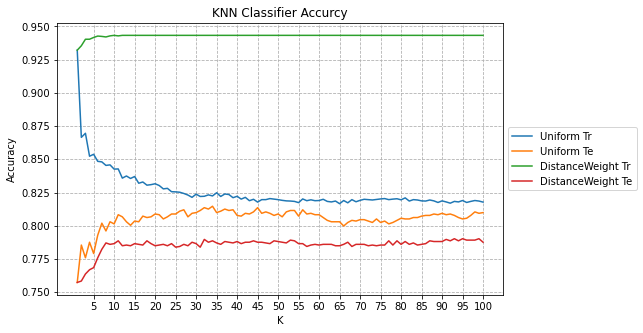

In [67]:
plt.figure(figsize=(8,5))
plt.plot(acc_DF['K'], acc_DF['NoWeight Tr'], label ="Uniform Tr")
plt.plot(acc_DF['K'], acc_DF['NoWeight Te'], label ="Uniform Te")
plt.plot(acc_DF['K'], acc_DF['Distance-Weight Tr'], label ="DistanceWeight Tr")
plt.plot(acc_DF['K'], acc_DF['Distance-Weight Te'], label ="DistanceWeight Te")
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("KNN Classifier Accurcy")
plt.grid(linestyle = '--')
plt.xticks(df['K'])
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

In [68]:
#The testing and the training scores of the Uniform distance had lesser gap compared to the distance weight
#The highest accuracy for unifrom distance is K=27 for the smallest K
K = 27
knn_clf = neighbors.KNeighborsClassifier(K)
knn_clf.fit(adult_tr_norm, adult_tar_tr)
tr_acc = knn_clf.score(adult_tr_norm, adult_tar_tr)
te_acc = knn_clf.score(adult_te_norm, adult_tar_te)
print("Accuracy for Training when K=4: " + str(tr_acc))
print("Accuracy for Testing when K=4: " + str(te_acc))

Accuracy for Training when K=4: 0.8242794527825741
Accuracy for Testing when K=4: 0.8120021242697822


2(iii) : Next, using only "uniform" weights, compare the accuracy of the KNN classifier across the different values of K on the training and the test data. You should show the results in a single figure with two line plots for the test and training accuracy values (y-axis) and with values of K in the x-axis. What range of values of K represent overfitting? Briefly explain.

In [69]:
def knn_test_trainAccuract(adult_te_norm, adult_tar_te, adult_tr_norm, adult_tar_tr):
    acc= np.zeros([100,3], dtype = float)
    index=0
    for K in range(1,101):
        knn_clf_tr = neighbors.KNeighborsClassifier(K)
        knn_clf_tr.fit(adult_tr_norm, adult_tar_tr)
        acc_tr =(knn_clf_tr.score(adult_tr_norm, adult_tar_tr))
        knn_clf_te = neighbors.KNeighborsClassifier(K)
        knn_clf_te.fit(adult_te_norm, adult_tar_te)
        acc_te =(knn_clf_tr.score(adult_te_norm, adult_tar_te))
        acc[index] = [K, acc_tr, acc_te]
        index +=1    
    return acc

In [70]:
acc = knn_test_trainAccuract(adult_te_norm, adult_tar_te, adult_tr_norm, adult_tar_tr)

In [71]:
acc_tr_te = pd.DataFrame(acc, columns = ['K', 'Tr Accuracy', 'Te Accuracy'] )
acc_tr_te.head()

,K,Tr Accuracy,Te Accuracy
0,1.0,0.93,0.76
1,2.0,0.87,0.79
2,3.0,0.87,0.78
3,4.0,0.85,0.79
4,5.0,0.85,0.78


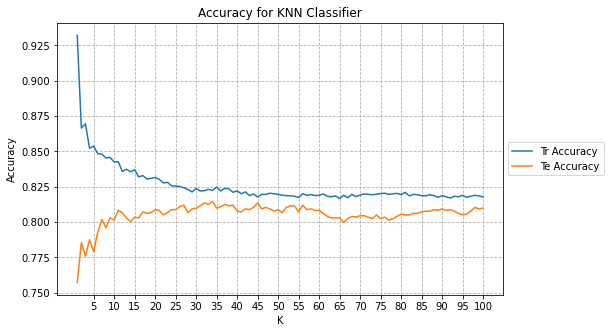

In [72]:
#Tr - Train
#Te - Test
plt.figure(figsize=(8,5))
plt.plot(acc_tr_te['K'], acc_tr_te['Tr Accuracy'], label ="Tr Accuracy")
plt.plot(acc_tr_te['K'], acc_tr_te['Te Accuracy'], label ="Te Accuracy")
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Accuracy for KNN Classifier")
plt.grid(linestyle = '--')
plt.xticks(df['K'])
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

The points from 3-20 in K Values have overfitting present by 1% +/- 1.5%. However, when the K value increases, the training and testing accuracy gap gets smaller, resulting in less overfitting.

c. [10 pts] Using the non-normalized training and test data, perform classification using scikit-learn's decision tree classifier (using the default parameters). As above, generate the confusion matrix, classification report, and average accuracy scores of the classifier. Compare the average accuracy score on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade-off? Next, create another decision tree model (trained on the non-normalized training data) using "gini" index as the selection criteria, min_samples_split=10, and max_depth=4. Show the accuracy results for both the training and test sets. For this model generate a visualization of tree embedded in the Jupyter Notebook.

In [73]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)

In [74]:
tree_clf = tree_clf.fit(adult_tr, adult_tar_tr)

In [75]:
tree_preds_te = tree_clf.predict(adult_te)
print(tree_preds_te)

[0 0 0 ... 0 0 0]


In [76]:
print("Test score",tree_clf.score(adult_te, adult_tar_te))
print("Train score",tree_clf.score(adult_tr, adult_tar_tr))

Test score 0.7604885820499203
Train score 0.9313321822287156


In [77]:
print(classification_report(adult_tar_te, tree_preds_te))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1417
           1       0.52      0.44      0.48       466

    accuracy                           0.76      1883
   macro avg       0.67      0.65      0.66      1883
weighted avg       0.75      0.76      0.75      1883



In [78]:
tree_cm = confusion_matrix(adult_tar_te, tree_preds_te)
print(tree_cm)

[[1227  190]
 [ 261  205]]


The overfitting occurs in the Decision Tree, and there is a gap of 18% between training and the testing accuracy.   

In [79]:
tree_clf_2 = tree.DecisionTreeClassifier(criterion ='gini', min_samples_split = 10, max_depth =4)

In [80]:
tree_clf_2 = tree_clf_2.fit(adult_tr, adult_tar_tr)

In [81]:
tree_preds_test_2 = tree_clf_2.predict(adult_te)
print(tree_preds_test_2)

[0 0 0 ... 0 0 0]


In [82]:
print("Test score",tree_clf_2.score(adult_te, adult_tar_te))
print("Train score",tree_clf_2.score(adult_tr, adult_tar_tr))

Test score 0.8130642591609134
Train score 0.817638464603533


In [83]:
print(classification_report(adult_tar_te, tree_preds_test_2))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88      1417
           1       0.69      0.44      0.54       466

    accuracy                           0.81      1883
   macro avg       0.76      0.69      0.71      1883
weighted avg       0.80      0.81      0.80      1883



In [84]:
tree_cm_2 = confusion_matrix(adult_tar_te, tree_preds_test_2)
print(tree_cm_2)

[[1327   90]
 [ 262  204]]


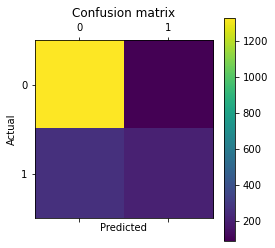

In [85]:
import pylab as plt
%matplotlib inline
plt.matshow(tree_cm_2)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [86]:
#Importing Packages
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [87]:
tree = export_graphviz(tree_clf_2, out_file=None, feature_names= adult_tr.columns, class_names=['0','1'])
graph = Source(tree)

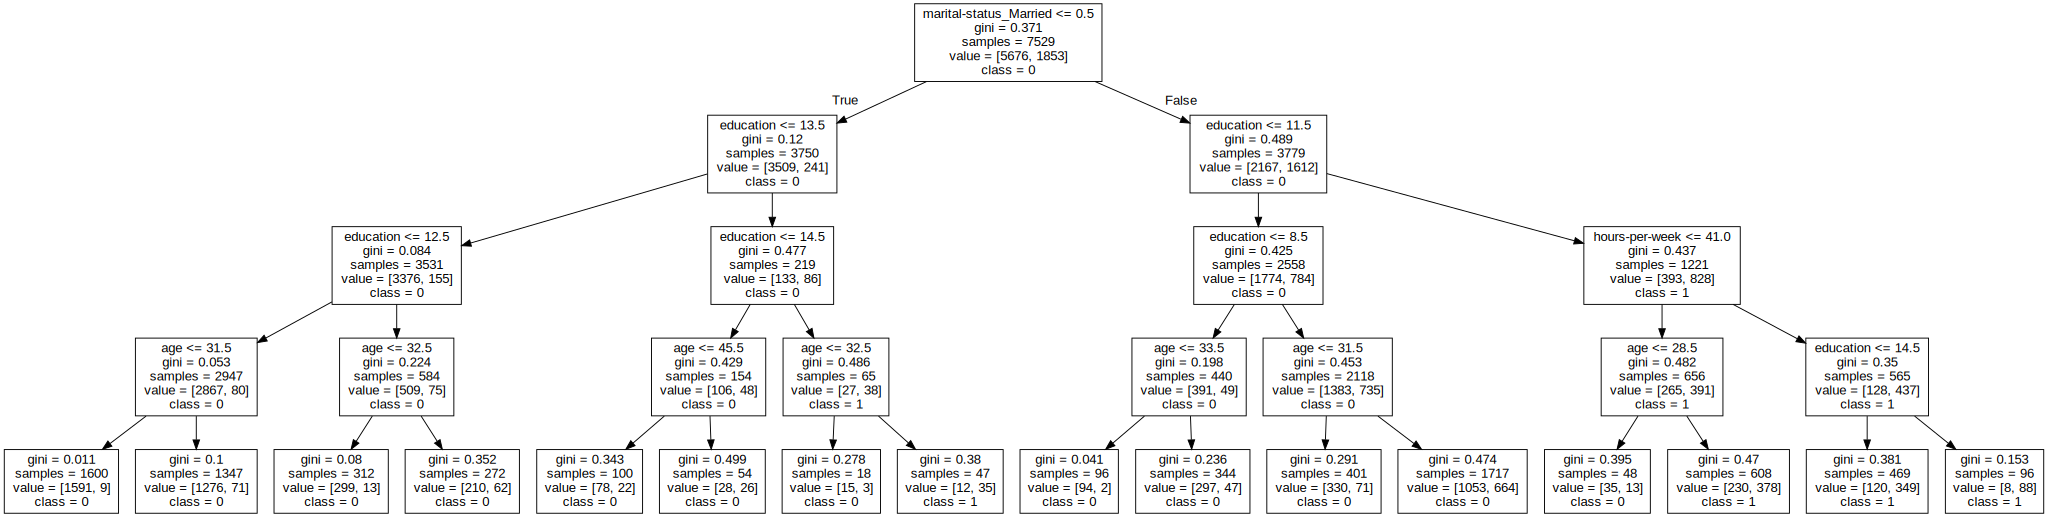

In [88]:
display(SVG(graph.pipe(format = 'svg')))

d. [10 pts] Use scikit-learn to build classifiers using Naive Bayes (Gaussian) and linear discriminant analysis (LDA).  For each of these perform 10-fold cross-validation on the 80% training data (using cross-validation module in scikit-learn) and report the overall average accuracy. Compare this cross-validation accuracy to the model accuracy on the training data as a whole. Finally, run your model on the set-aside 20% test data.

Naive Bayes (Gaussian)

In [89]:
#Importing the Packages
from sklearn import neighbors, tree, naive_bayes
from sklearn.model_selection import cross_val_score
nb_clf = naive_bayes.GaussianNB()
nb_clf = nb_clf.fit(adult_tr, adult_tar_tr)
nb_preds_te = nb_clf.predict(adult_te)
print (nb_preds_te)

[0 1 0 ... 0 0 1]


In [90]:
print (nb_clf.score(adult_tr, adult_tar_tr))

0.7218754150617612


In [91]:
print (nb_clf.score(adult_te, adult_tar_te))

0.7110993096123208


In [92]:
nb_clf = naive_bayes.GaussianNB()
nb_clf = nb_clf.fit(adult_tr, adult_tar_tr)
print ("Score on Training: ", nb_clf.score(adult_tr, adult_tar_tr))
print ("Score on Test: ", nb_clf.score(adult_te, adult_tar_te))

Score on Training:  0.7218754150617612
Score on Test:  0.7110993096123208


In [93]:
cross_val_scores = cross_val_score(nb_clf, adult_tr, adult_tar_tr, cv=5)
print(cross_val_scores)

[0.72 0.71 0.74 0.71 0.72]


In [94]:
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cross_val_scores.mean(), cross_val_scores.std() * 2))

Overall Accuracy: 0.72 (+/- 0.02)


Linear Discriminant Analysis (LDA)

In [95]:
#Importing the Packages
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ld_clf = LinearDiscriminantAnalysis()
ld_clf = ld_clf.fit(adult_tr, adult_tar_tr)
ld_preds_te = ld_clf.predict(adult_te)
print(ld_preds_te)

[0 0 0 ... 0 0 0]


In [96]:
print(ld_clf.score(adult_tr, adult_tar_tr))

0.8115287554788152


In [97]:
print(ld_clf.score(adult_te, adult_tar_te))

0.7992565055762082


In [98]:
#Tr - Training
#Te - Testing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ld_clf = LinearDiscriminantAnalysis()
ld_clf = ld_clf.fit(adult_tr, adult_tar_tr)
print ("Score on Tr: ", ld_clf.score(adult_tr, adult_tar_tr))
print ("Score on Te: ", ld_clf.score(adult_te, adult_tar_te))

Score on Tr:  0.8115287554788152
Score on Te:  0.7992565055762082


In [99]:
cross_val_scores_LDtrain = cross_val_score(ld_clf, adult_tr, adult_tar_tr, cv=5)
print(cross_val_scores_LDtrain)

[0.81 0.81 0.81 0.8  0.82]


In [100]:
print("Overall Accuracy for tr: %0.2f (+/- %0.2f)" % (cross_val_scores_LDtrain.mean(), cross_val_scores.std() * 2))

Overall Accuracy for tr: 0.81 (+/- 0.02)


In [101]:
cross_val_scores_LDtest = cross_val_score(ld_clf, adult_te, adult_tar_te, cv=5)
print(cross_val_scores_LDtest)

[0.81 0.78 0.8  0.81 0.8 ]


In [102]:
print("Overall Accuracy for te: %0.2f (+/- %0.2f)" % (cross_val_scores_LDtest.mean(), cross_val_scores.std() * 2))

Overall Accuracy for te: 0.80 (+/- 0.02)


Hence, the highest overfitting is present in the Decision Tree without the parameters. Therefore, KNN with K = 27 has the best accuracy.